# Talbe of contents

* [Introduction](#introduction)
* [Import libraries](#importlibraries)
* [PART A: Detect and fix errors in dirty dataset](#part_a)
    * [Step 01: Read data](#step01)
    * [Step 02: EDA](#step02)
    * [Step 03: Replace wrong branch_codes](#step03)
    * [Step 04: Replace wrong lat and lon](#step04)
    * [Step 05: Check whether time and order_type are match](#step05)
    * [Step 06: Detect and fix errors in order_items and order_price columns](#step06)
    * [Step 07: For each order_type, find price for each item](#step07)
    * [Step 08: Correct mistakes in order_items and order_price](#step08)
    * [Step 09: Correct mistakes in date format](#step09)
    * [Step 10: Correct mistakes in distance and branch_code](#step10)
    * [Step 11: Get linear regression for delivery_fee](#step11)
    * [Step 12: Apply linear regression to df](#step12)
* [PART B: Dect and remove outlier rows in outlier dataset](#part_b)
    * [Step 01: First time Investigate outliers for "delivery_fee"](#step1)
    * [Step 02: Multivariate Outlier Detection(by using Linear models)"](#step2)
    * [Step 03: Linear models for multivariate outlier (Box plot)](#step3)
    * [Step 04: Remove outliers for "delivery_fee"](#step4)
    * [Step 05: Output the csv file](#step5)
* [PART C: Impute the missing values in missing dataset](#part_c)
    * [Step 01: EDA](#step_c1)
    * [Step 02: Impute the missing data of delivery_fee](#step_c2)
        * [2.1 Create a dataset that has no missing values](#partc2-1)
        * [2.2 Train a linear regression model and predict the 'delivery_fee' values for the missing data set](#partc2-2)
        * [2.3 Impute the missing data of delivery_fee](#partc2-3)
    * [Step 03: Impute the missing data of branch_code( which has distance)](#part_c3)
        * [3.1 Build the networkx for Djikstra algorithm](#partc3-1)
        * [3.2 Impute the missing data of branch_code](#partc3-2)
    * [Step 04: Impute the missing data of branch_code( which has no value of distance) and distance](#part_c4)
        * [4.1 Impute the missing data of branch_code and distance](#partc4-1)
    * [Step 05: Out put the file](#part_c5)
* [Summary](#summary)

# Introduction
<a id="introduction"></a>
In this assignment, we will perform graphical and/or non-graphical EDA methods to analyze the data first and then find the problems in the data.
In additional, we will try to fix the problems in the data:
* First, we will detect and fix errors in dirty dataset. 
* Second, we will detect and remove outlier rows in outlier dataset.
* Third, we will impute the missing values in missing dataset.

# Import libraries
<a id="importlibraries"></a>
Import some libraries for this assignment:
* pandas (for dataframe, included in Anaconda Python 3.7) 
* re (for regular expression, included in Anaconda Python 3.7)
* sklearn
* networkx
* matplotlib

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, date
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# PART A:  Detect and fix errors in dirty dataset
<a id="part_a"></a>

## Step 01: Read data
<a id="step01"></a>

In [2]:
df = pd.read_csv("Group081_dirty_data.csv")
missing = pd.read_csv('Group081_missing_data.csv')
outlier = pd.read_csv("Group081_outlier_data.csv")
branch = pd.read_csv("branches.csv")
edge = pd.read_csv("edges.csv")
node = pd.read_csv("nodes.csv")

## Step 02: EDA
<a id="step02"></a>

### Show df

In [3]:
df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY05823,06-04-2018,11:02:32,Breakfast,TP,"[('Pancake', 4), ('Eggs', 7)]",251.0,-37.818441,144.964180,0,7.618,10.018500
1,ORDA10162,2018-04-06,11:02:32,Breakfast,BK,"[('Eggs', 4), ('Pancake', 2)]",136.5,-37.802820,144.995686,0,8.310,10.589220
2,ORDB07824,2018-08-16,15:26:11,Lunch,TP,"[('Chicken', 4), ('Fries', 7)]",409.0,-37.811334,145.008678,0,11.789,14.606379
3,ORDI10779,2018-16-11,18:38:52,Dinner,NS,"[('Shrimp', 1), ('Pasta', 2), ('Salmon', 10)]",519.0,-37.804902,144.969147,0,6.596,13.080493
4,ORDY08212,2018-09-09,16:16:54,Dinner,TP,"[('Salmon', 7), ('Fish&Chips', 7)]",705.0,-37.806302,144.941563,0,10.301,15.876151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [5]:
df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,487.809000,-30.753426,143.503576,0.136000,8.882980,13.743830
std,256.897009,25.336550,16.299568,0.343132,1.701935,2.587990
min,37.000000,-37.827631,-37.825437,0.000000,3.562000,4.508930
25%,296.812500,-37.817948,144.949054,0.000000,7.851000,12.646619
50%,435.700000,-37.811293,144.963059,0.000000,8.944500,13.996054
75%,656.400000,-37.803670,144.981415,0.000000,9.979500,15.246481
max,1385.500000,144.994594,145.015964,1.000000,13.828000,19.421625


In [6]:
df.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,307,72,3,6,498
top,ORDJ10070,2018-07-31,11:43:05,Dinner,TP,"[('Coffee', 3), ('Pancake', 2)]"
freq,1,5,13,176,182,2


In [7]:
node.describe()

,node,lat,lon
count,1.711700e+04,17117.000000,17117.000000
mean,2.023147e+09,-37.812451,144.966743
std,1.978621e+09,0.008005,0.021438
min,2.157811e+07,-38.110916,144.654173
25%,4.888793e+08,-37.818766,144.951965
50%,8.465677e+08,-37.812767,144.964104
75%,3.215192e+09,-37.806185,144.981581
max,6.282174e+09,-37.739636,145.046450


### Findging:
* According to df.describe(include=['O']),**it is clear that there are 6 types of branch_code in df whose number is supposed to be 3**
* Compare lat and lon in df and node, **we can find that some of them are reverse from the max of lat and the min of lon.**
* We can find that some of lat are larger than 0, which is incorrect. We need to exchange them into negative.

## Step 03: Replace wrong branch_codes
<a id="step03"></a>
According to df.describe(include=['O']),it is clear that there are 6 types of branch_code in df whose number is supposed to be 3

In [8]:
# count how many kinds of branch_code in df
df.branch_code.value_counts()

TP    182
BK    150
NS    144
bk      9
tp      8
ns      7
Name: branch_code, dtype: int64

In [9]:
# replace wrong branch_codes
df.branch_code.replace({'bk':'BK','tp':'TP','ns':'NS'},inplace=True)

In [10]:
# check the result
df.branch_code.value_counts()

TP    190
BK    159
NS    151
Name: branch_code, dtype: int64

In [11]:
df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,487.809000,-30.753426,143.503576,0.136000,8.882980,13.743830
std,256.897009,25.336550,16.299568,0.343132,1.701935,2.587990
min,37.000000,-37.827631,-37.825437,0.000000,3.562000,4.508930
25%,296.812500,-37.817948,144.949054,0.000000,7.851000,12.646619
50%,435.700000,-37.811293,144.963059,0.000000,8.944500,13.996054
75%,656.400000,-37.803670,144.981415,0.000000,9.979500,15.246481
max,1385.500000,144.994594,145.015964,1.000000,13.828000,19.421625


## Step 04: Replace wrong lat and lon
<a id="step04"></a>
* Compare lat and lon in df and node, we can find that some of them are reverse from the max of lat and the min of lon.
* Still, we can find that some of lat are larger than 0, which is incorrect. We need to exchange them into negative.

In [12]:
# show the rows whose lat and lon are reverse
df[df.customer_lat > df.customer_lon]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
89,ORDB01908,2018-02-17,09:31:16,Breakfast,TP,"[('Eggs', 9), ('Coffee', 10), ('Pancake', 10),...",683.5,144.937583,-37.821925,0,9.767,13.627233
294,ORDJ10070,2018-11-01,18:08:27,Dinner,TP,"[('Pasta', 2), ('Shrimp', 2)]",163.0,144.981127,-37.825437,0,9.038,13.217598
403,ORDK02834,2018-10-25,17:48:10,Dinner,BK,"[('Salmon', 2), ('Pasta', 8)]",302.0,144.994594,-37.809927,0,4.615,11.364825
470,ORDY09387,2018-03-24,10:42:15,Breakfast,TP,"[('Coffee', 4), ('Eggs', 4), ('Pancake', 4)]",215.0,144.975624,-37.818579,0,8.412,13.024654


In [13]:
# create an id_list for these rows
id_list = df[df.customer_lat > df.customer_lon].order_id.values

In [14]:
# exchange lat and lon for each row
for order_id in id_list:
    lat = df[df.order_id == order_id].customer_lon.values[0]
    lon = df[df.order_id == order_id].customer_lat.values[0]
    df.loc[df.order_id == order_id, ["customer_lat", "customer_lon"]] = [lat, lon]

In [15]:
# check result
df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,487.809000,-32.215755,144.965906,0.136000,8.882980,13.743830
std,256.897009,19.815830,0.022574,0.343132,1.701935,2.587990
min,37.000000,-37.827631,144.916487,0.000000,3.562000,4.508930
25%,296.812500,-37.818148,144.949270,0.000000,7.851000,12.646619
50%,435.700000,-37.811500,144.963274,0.000000,8.944500,13.996054
75%,656.400000,-37.803916,144.981500,0.000000,9.979500,15.246481
max,1385.500000,37.826512,145.015964,1.000000,13.828000,19.421625


#### Still, we can find that some of lat are larger than 0, which is incorrect. We need to exchange them into negative.

In [16]:
# show the rows with wrong lat
df[df.customer_lat > 0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
27,ORDA09348,2018-08-30,15:56:37,Lunch,BK,"[('Salad', 3), ('Burger', 2), ('Fries', 9), ('...",381.60,37.826512,144.955610,0,8.971,14.574226
29,ORDC02485,2018-12-19,19:39:43,Dinner,NS,"[('Fish&Chips', 1), ('Pasta', 1)]",62.50,37.825428,144.989805,0,9.813,16.109068
37,ORDY10599,2018-07-22,14:35:29,Lunch,TP,"[('Steak', 3), ('Burger', 3), ('Salad', 2), ('...",362.40,37.809031,144.947549,0,9.733,14.853120
49,ORDJ06303,2018-10-14,17:27:53,Dinner,TP,"[('Pasta', 10), ('Shrimp', 7), ('Fish&Chips', ...",1003.00,37.819317,144.962143,0,8.080,14.115400
56,ORDI01491,2018-07-31,14:55:46,Lunch,NS,"[('Salad', 9), ('Fries', 4)]",202.80,37.812959,145.015570,0,12.083,17.682507
60,ORDY10093,2018-01-22,08:40:33,Breakfast,TP,"[('Eggs', 3), ('Cereal', 7)]",213.00,37.806778,144.973482,0,9.376,11.901555
73,ORDX00815,2018-05-21,12:33:48,Lunch,BK,"[('Salad', 3), ('Fries', 4), ('Steak', 8), ('C...",649.60,37.805669,144.957248,0,7.969,14.151643
84,ORDA09589,2018-11-18,18:38:52,Dinner,BK,"[('Fish&Chips', 3), ('Pasta', 9), ('Salmon', 6...",868.50,37.814048,144.935994,0,10.207,19.421625
92,ORDC06752,2018-08-01,14:55:46,Lunch,NS,"[('Steak', 3), ('Burger', 1)]",166.00,37.807543,144.947993,0,8.734,14.479736
102,ORDA01911,2018-04-12,11:12:40,Breakfast,BK,"[('Eggs', 10), ('Pancake', 3), ('Cereal', 2)]",334.75,37.824074,144.988758,0,6.363,11.323930


In [17]:
# create id_list for rows
id_list = df[df.customer_lat > 0].order_id.values

In [18]:
# correct these rows by transforming them into nagetive
for order_id in id_list:
    lat = -df[df.order_id == order_id].customer_lat.values[0]
    df.loc[df.order_id == order_id, "customer_lat"] = lat

## Step 05: Check whether time and order_type are match
<a id="step05"></a>


   Check breakfast and transform error order_type into "Breadfast"

In [19]:
# check breakfast
df[(df.time >= '08:00:00')\
   & (df.time <= '12:00:00')\
   & (df.order_type != 'Breakfast')]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
20,ORDI03857,2018-03-19,10:32:06,Dinner,NS,"[('Cereal', 9), ('Eggs', 6), ('Pancake', 1)]",345.25,-37.817384,144.967452,0,8.310,13.335615
74,ORDB06869,2018-02-17,09:31:16,Dinner,TP,"[('Coffee', 6), ('Eggs', 2)]",89.00,-37.803972,144.950015,0,9.989,14.337016
120,ORDY07911,2018-04-23,11:43:05,Dinner,TP,"[('Cereal', 9), ('Eggs', 9), ('Coffee', 2)]",402.00,-37.818763,144.953404,0,8.509,10.832344
188,ORDB03701,2018-04-07,11:12:40,Lunch,TP,"[('Cereal', 3), ('Eggs', 1), ('Pancake', 3)]",157.75,-37.818137,145.010755,0,11.682,15.747217
218,ORDA05356,2018-02-11,09:21:07,Dinner,BK,"[('Pancake', 5), ('Eggs', 9)]",319.25,-37.815933,144.972188,0,6.967,14.913499
332,ORDB01911,2018-04-24,11:43:05,Dinner,TP,"[('Eggs', 6), ('Coffee', 10), ('Cereal', 9)]",396.00,-37.818848,144.953388,0,8.503,11.864622
343,ORDJ07000,2018-01-19,08:30:25,Dinner,TP,"[('Cereal', 5), ('Eggs', 5)]",215.00,-37.800604,144.973855,0,10.113,12.561109
349,ORDJ06773,2018-03-04,10:01:41,Lunch,TP,"[('Coffee', 1), ('Eggs', 8), ('Cereal', 3)]",246.50,-37.823727,144.940404,0,9.506,13.773804
400,ORDI00012,2018-04-26,11:43:05,Dinner,NS,"[('Pancake', 4), ('Cereal', 6), ('Eggs', 8), (...",421.50,-37.818224,144.965224,0,8.519,13.580110


In [20]:
# transform order_type into "Breakfast"
df.loc[(df.time >= '08:00:00')\
       & (df.time <= '12:00:00')\
       & (df.order_type != 'Breakfast')\
       , 'order_type']\
= 'Breakfast'


   Check lunch and transform error order_type into "Lunch"

In [21]:
# check lunch
df[(df.time >= '12:00:01')\
   & (df.time <= '16:00:00')\
   & (df.order_type != 'Lunch')]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
19,ORDY07460,2018-05-30,12:54:05,Dinner,TP,"[('Chicken', 7), ('Steak', 2)]",314.0,-37.806956,144.989905,0,10.412,13.779491
48,ORDB10210,2018-08-09,15:16:03,Breakfast,TP,"[('Fries', 9), ('Salad', 3), ('Steak', 9), ('C...",1132.6,-37.799204,144.963131,0,9.915,13.499289
94,ORDB10148,2018-08-18,15:36:20,Breakfast,TP,"[('Fries', 1), ('Burger', 3)]",105.0,-37.810478,145.003277,0,11.341,16.076751
167,ORDZ04302,2018-08-22,15:46:28,Dinner,NS,"[('Burger', 10), ('Chicken', 8), ('Salad', 4),...",694.8,-37.811882,144.978992,0,7.960,13.157361
223,ORDI02976,2018-08-20,15:36:20,Dinner,NS,"[('Salad', 3), ('Steak', 4), ('Fries', 1)]",243.6,-37.804107,144.948378,0,8.561,14.355167
310,ORDY08815,2018-07-31,14:55:46,Breakfast,TP,"[('Steak', 8), ('Burger', 1)]",391.0,-37.812098,144.973868,0,8.782,11.763399
324,ORDB09330,2018-06-07,13:14:21,Dinner,TP,"[('Steak', 10), ('Chicken', 3)]",546.0,-37.803674,144.949303,0,9.893,13.077465
339,ORDK04639,2018-07-14,14:25:21,Dinner,BK,"[('Salad', 7), ('Fries', 9), ('Chicken', 2), (...",354.4,-37.818662,145.000787,0,4.805,13.222775
368,ORDC09771,2018-08-23,15:46:28,Dinner,NS,"[('Fries', 7), ('Salad', 9), ('Chicken', 7)]",462.8,-37.823271,144.988527,0,9.437,14.688832
370,ORDY01007,2018-05-03,12:03:22,Breakfast,TP,"[('Chicken', 4), ('Burger', 10), ('Fries', 6),...",647.6,-37.805827,144.959454,0,9.022,12.401785


In [22]:
# transform order_type into "Lunch"
df.loc[(df.time >= '12:00:01')\
       & (df.time <= '16:00:00')\
       & (df.order_type != 'Lunch')\
       , 'order_type']\
= 'Lunch'


   Check dinner and transform error order_type into "Dinner"

In [23]:
# check dinner
df[(df.time >= '16:00:01')\
   & (df.time <= '20:00:00')\
   & (df.order_type != 'Dinner')]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
66,ORDY08984,2018-09-16,16:37:10,Lunch,TP,"[('Pasta', 10), ('Shrimp', 2)]",383.0,-37.816326,144.964048,0,7.767,13.725431
97,ORDK04538,2018-09-03,16:06:45,Lunch,BK,"[('Pasta', 8), ('Salmon', 7), ('Shrimp', 8)]",939.0,-37.813262,144.938534,0,9.849,16.906533
113,ORDJ02397,2018-12-26,19:49:51,Lunch,TP,"[('Fish&Chips', 3), ('Pasta', 10)]",380.0,-37.803485,144.965472,0,9.487,13.285106
121,ORDK01017,2018-09-05,16:06:45,Breakfast,BK,"[('Pasta', 8), ('Salmon', 2)]",302.0,-37.818716,144.916805,0,11.970,18.479813
127,ORDJ06480,2018-09-05,16:06:45,Breakfast,TP,"[('Shrimp', 10), ('Salmon', 9), ('Pasta', 6)]",1074.0,-37.815266,144.927789,0,11.734,15.367371
137,ORDC00519,2018-11-04,18:08:27,Breakfast,NS,"[('Salmon', 5), ('Pasta', 4), ('Fish&Chips', 3)]",420.0,-37.821431,144.947395,0,9.875,17.618564
204,ORDX04965,2018-10-28,17:58:18,Breakfast,BK,"[('Salmon', 4), ('Fish&Chips', 7)]",409.0,-37.821478,144.969345,0,7.851,17.093768
313,ORDZ06384,2018-09-19,16:37:10,Lunch,NS,"[('Fish&Chips', 8), ('Shrimp', 7), ('Salmon', ...",1013.5,-37.815116,145.001482,0,10.084,16.242409
358,ORDY05477,2018-12-03,19:09:17,Breakfast,TP,"[('Shrimp', 1), ('Pasta', 1), ('Salmon', 1)]",122.5,-37.817090,144.960625,0,8.081,11.832893
405,ORDA00816,2018-09-17,16:37:10,Lunch,BK,"[('Salmon', 1), ('Fish&Chips', 4), ('Pasta', 8)]",401.0,-37.803774,144.918848,0,11.524,18.555678


In [24]:
# transform order_type into "Dinner"
df.loc[(df.time >= '16:00:01')\
       & (df.time <= '20:00:00')\
       & (df.order_type != 'Dinner')\
       , 'order_type']\
= 'Dinner'


   check if there any time are not in the range of 8:00:00 to 20:00:00

In [25]:
# check if there any time are not in the range of 8:00:00 to 20:00:00
df[(df.time >= '20:00:01')\
   | (df.time < '08:00:00')\
 ]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


## Step 06: Detect and fix errors in order_items and order_price columns
<a id="step06"></a>
In this step,we get right meal sets from outliers file. Then we find items in df. Compare these two sets to find thd different items.¶

In [26]:
# define a function to find items in order_items without numbers and put them in a set
def find_items(items_array):
    item_pattern = re.compile(r'\(\'(.*?)\'\, \d*\)')
    items_set = set()
    for items in items_array:
        for item in re.findall(item_pattern, items):
            items_set.add(item)
    return items_set

In [27]:
# extract order_items from outlier file
items_breakfast = outlier[outlier.order_type == 'Breakfast'].order_items.values
items_lunch = outlier[outlier.order_type == 'Lunch'].order_items.values
items_dinner = outlier[outlier.order_type == 'Dinner'].order_items.values

In [28]:
# extract items without number
breakfast_set = find_items(items_breakfast)
lunch_set = find_items(items_lunch)
dinner_set = find_items(items_dinner)

In [29]:
# extract order_items from dirty_data file
dirty_breakfast = df[df.order_type == 'Breakfast'].order_items.values
dirty_lunch = df[df.order_type == 'Lunch'].order_items.values
dirty_dinner = df[df.order_type == 'Dinner'].order_items.values

In [30]:
# extract items without number
dirty_break_set = find_items(dirty_breakfast)
dirty_lunch_set = find_items(dirty_lunch)
dirty_dinner_set = find_items(dirty_dinner)

In [31]:
# find different items between dirty set and correct set
diff_br = dirty_break_set - breakfast_set
diff_lunch = dirty_lunch_set - lunch_set
diff_dinner = dirty_dinner_set - dinner_set

In [32]:
# drop all na data in missing
missing = missing.dropna(how = 'any')

In [33]:
# define a function to transform order_items into dictionary
def trans_item(order_items):
    item_pattern = re.compile(r'\(\'(.*?)\'\, \d*\)')
    qty_pattern = re.compile(r'\(\'.*?\'\, (\d*)\)')
    list_item = re.findall(item_pattern, order_items)
    list_qty = re.findall(qty_pattern, order_items)
    items_dict = {}
    for i in range(len(list_item)):
        items_dict[list_item[i]] = list_qty[i]
    return items_dict

In [34]:
# apply function to missing dataframe
missing['order_items']=missing.apply(lambda x: trans_item(x.order_items)
                                     , axis=1)

## Step 07: For each order_type, find price for each item
<a id="step07"></a>

In [35]:
# initial lists
Pancake_coef, Eggs_coef, Cereal_coef, Coffee_coef, coef_list = [], [], [], [], []

# choose breakfast
missing_br = missing[missing.order_type == 'Breakfast']

# get order_items
br_items_list = missing_br.order_items

for items_dict in br_items_list:
    
    coef = [] # coefficient for a row
    
    # if exists, get value of the dictionary; otherwise the coef is 0
    if 'Pancake' in items_dict:
        coef.append(int(items_dict['Pancake']))
    else:
        coef.append(0)
    
    # if exists, get value of the dictionary; otherwise the coef is 0
    if 'Eggs' in items_dict:
        coef.append(int(items_dict['Eggs']))
    else:
        coef.append(0)

    # if exists, get value of the dictionary; otherwise the coef is 0
    if 'Cereal' in items_dict:
        coef.append(int(items_dict['Cereal']))
    else:
        coef.append(0)
    
    # if exists, get value of the dictionary; otherwise the coef is 0
    if 'Coffee' in items_dict:
        coef.append(int(items_dict['Coffee']))
    else:
        coef.append(0) 
    
    # append coefficient into coef_list 
    coef_list.append(coef)
    
# get price list
price_list = missing_br.order_price.tolist()

# get result of the linear system
x = np.linalg.solve(coef_list[:4], price_list[:4])

# set up a dictionary for breakfast items
br_dict = {'Pancake': round(x[0],3),
           'Eggs': round(x[1], 3),
           'Cereal': round(x[2], 3),
           'Coffee': round(x[3], 3)
          }

In [36]:
# initial lists
Burger_coef, Chicken_coef, Fries_coef, Salad_coef, Steak_coef, coef_list = [], [], [], [], [], []

# choose lunch
missing_lunch = missing[missing.order_type == 'Lunch']

# get order_items
lunch_items_list = missing_lunch.order_items
for items_dict in lunch_items_list:
    coef = [] # coefficient for a row
    
    # if exists, get value of the dictionary; otherwise the coef is 0
    if 'Burger' in items_dict:
        coef.append(int(items_dict['Burger']))
    else:
        coef.append(0)
    
    # if exists, get value of the dictionary; otherwise the coef is 0
    if 'Chicken' in items_dict:
        coef.append(int(items_dict['Chicken']))
    else:
        coef.append(0)
    
    # if exists, get value of the dictionary; otherwise the coef is 0
    if 'Fries' in items_dict:
        coef.append(int(items_dict['Fries']))
    else:
        coef.append(0)
        
    # if exists, get value of the dictionary; otherwise the coef is 0    
    if 'Salad' in items_dict:
        coef.append(int(items_dict['Salad']))
    else:
        coef.append(0) 
    
    # if exists, get value of the dictionary; otherwise the coef is 0
    if 'Steak' in items_dict:
        coef.append(int(items_dict['Steak']))
    else:
        coef.append(0) 
        
    # append coefficient into coef_list
    coef_list.append(coef)

# get price list    
price_list = missing_lunch.order_price.tolist()

# get result of the linear system
x = np.linalg.solve(coef_list[:5], price_list[:5])

# set up a dictionary for breakfast items
lunch_dict = {'Burger': round(x[0],3),
           'Chicken': round(x[1], 3),
           'Fries': round(x[2], 3),
           'Salad': round(x[3], 3),
           'Steak': round(x[4], 3),
          }

In [37]:
# initial lists
FishChips_coef, Pasta_coef, Salmon_coef, Shrimp_coef, coef_list = [], [], [], [], []

# choose lunch
missing_dinner = missing[missing.order_type == 'Dinner']

# get order_items
dinner_items_list = missing_dinner.order_items

for items_dict in dinner_items_list:
    coef = [] # coefficient for a row
    
    # if exists, get value of the dictionary; otherwise the coef is 0 
    if 'Fish&Chips' in items_dict:
        coef.append(int(items_dict['Fish&Chips']))
    else:
        coef.append(0)
    
    # if exists, get value of the dictionary; otherwise the coef is 0 
    if 'Pasta' in items_dict:
        coef.append(int(items_dict['Pasta']))
    else:
        coef.append(0)
    
    # if exists, get value of the dictionary; otherwise the coef is 0 
    if 'Salmon' in items_dict:
        coef.append(int(items_dict['Salmon']))
    else:
        coef.append(0)
    
    # if exists, get value of the dictionary; otherwise the coef is 0 
    if 'Shrimp' in items_dict:
        coef.append(int(items_dict['Shrimp']))
    else:
        coef.append(0) 
        
    # append coefficient into coef_list    
    coef_list.append(coef)
    
# get price list    
price_list = missing_dinner.order_price.tolist()

# get result of the linear system
x = np.linalg.solve(coef_list[:4], price_list[:4])

# set up a dictionary for breakfast items
dinner_dict = {'Fish&Chips': round(x[0],3),
           'Pasta': round(x[1], 3),
           'Salmon': round(x[2], 3),
           'Shrimp': round(x[3], 3)
          }

In [38]:
# combine all dictionaries for each order_type into one dictionary
item_dict = dict(br_dict, **lunch_dict, **dinner_dict)

In [39]:
# define a function to correct the wrong items and prices
def correct_items_price(diff_set, meal_dict, order_type):
    item_pattern = re.compile(r'\(\'(.*?)\'\, \d*\)')
    qty_pattern = re.compile(r'\(\'.*?\'\, (\d*)\)')
    for item in diff_set:
        df_items = df[[item in row for row in df.order_items]]
        df_items_br = df_items[df_items.order_type == order_type]
        id_list = df_items_br.order_id.values
        for item in df_items_br.order_items:
            list_item = re.findall(item_pattern, item)
            list_qty = re.findall(qty_pattern, item)
            order_price = 0
            order_items = ""
            for i in range(len(list_item)):
                if list_item[i] in meal_dict:
                    order_price += meal_dict[list_item[i]] * int(list_qty[i])
                    order_items += '(\'' + list_item[i] + '\', ' + list_qty[i] + '), '
            order_items = '[' + order_items.strip(', ') + ']'
        for id in id_list:
            df.loc[df.order_id == id,\
                   ["order_items", "order_price"]] = [order_items, order_price]

## Step 08: Correct mistakes in order_items and order_price
<a id="step08"></a>

In [40]:
# correct items and prices
correct_items_price(diff_br, br_dict, 'Breakfast')
correct_items_price(diff_lunch, lunch_dict, 'Lunch')
correct_items_price(diff_dinner, dinner_dict, 'Dinner')

In [41]:
# get id list
id_list = df.order_id.values

# set up patterns for item and qty
item_pattern = re.compile(r'\(\'(.*?)\'\, \d*\)')
qty_pattern = re.compile(r'\(\'.*?\'\, (\d*)\)')

for id in id_list:
    items = df[df.order_id == id].order_items.values[0] # order_items
    list_item = re.findall(item_pattern, items) # get list of items
    list_qty = re.findall(qty_pattern, items) # get list of qty
    order_price = 0 # intial price
    
    # add prices for each item
    for i in range(len(list_item)):
        order_price += item_dict[list_item[i]] * int(list_qty[i])
    
    # judge if the price is correct, if not, use order_price overwrite the former price
    if df[df.order_id == id].order_price.values[0] != order_price:
        df.loc[df.order_id == id, 'order_price'] = order_price
        print("The price of order_id: " + id + " has changed to " + str(round(order_price, 3)))

The price of order_id: ORDB07824 has changed to 212.0
The price of order_id: ORDY08212 has changed to 532.0
The price of order_id: ORDY10964 has changed to 218.0
The price of order_id: ORDX05988 has changed to 382.0
The price of order_id: ORDY09223 has changed to 111.25
The price of order_id: ORDI01491 has changed to 202.8
The price of order_id: ORDI01408 has changed to 630.0
The price of order_id: ORDB03640 has changed to 374.0
The price of order_id: ORDX05731 has changed to 419.8
The price of order_id: ORDY04216 has changed to 542.0
The price of order_id: ORDA00649 has changed to 1088.0
The price of order_id: ORDZ09991 has changed to 583.0
The price of order_id: ORDB10679 has changed to 377.0
The price of order_id: ORDB10505 has changed to 164.8
The price of order_id: ORDI09943 has changed to 250.8
The price of order_id: ORDI06328 has changed to 309.8
The price of order_id: ORDX06987 has changed to 436.0
The price of order_id: ORDY10877 has changed to 859.0
The price of order_id: ORD

## Step 09: Correct mistakes in date format
<a id="step09"></a>
assumption: For the dates seemed like 'xx-xx-yyyy', consider them in the format as 'dd-mm-yyyy'

In [42]:
# put all dates into a list
date_list = df.date.values

# create an empty list to store dates
new_date_list = []

# transform the format of dates and store in new list
for date in date_list:
    date = date.split('-')
    if len(date[2]) == 4:
        date[0],date[1],date[2] = date[2],date[1],date[0]
    if int(date[1]) > 12:
        date[1],date[2] = date[2],date[1]
    new_date_list.append('-'.join(date))
    
# use new list as the date column of the df
df.date = new_date_list

## Step 10: Correct mistakes in distance and branch_code
<a id="step10"></a>
First, get three distances in terms of tp, bk and ns respectively. Then calculated the supposed distance between the branch and the customer. If they do not match, check whther the distance is the same as anyone of these three branches. If the distance does not match anyone of them, replace original distance by calculated one.

In [43]:
edge_list = edge.loc[:, ['u', 'v']].values
weighted_edges_list = edge.loc[:, ['u', 'v','distance(m)']].values
node_list = node.node.values

In [44]:
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)
G.add_weighted_edges_from(weighted_edges_list)

In [45]:
def get_distance(source_node,target_node):
    distance=nx.dijkstra_path_length(G, source=source_node, target=target_node)/1000
    return distance

In [46]:
# get nodes of each branch, and build up a dictionary for them
node_tp = node[node.lat == branch[branch.branch_code == 'TP'].branch_lat.values[0]].node.values[0]
node_bk = node[node.lat == branch[branch.branch_code == 'BK'].branch_lat.values[0]].node.values[0]
node_ns = node[node.lat == branch[branch.branch_code == 'NS'].branch_lat.values[0]].node.values[0]
node_dict = {'TP': node_tp, 'BK': node_bk, 'NS': node_ns}

In [47]:
# get id list
id_list = df.order_id.values

# initial count
count = 0

for id in id_list:
    df_customer = df[df.order_id == id] # get a new dataframe
    branch = df_customer.branch_code.values[0] # get branch code
    node_branch = node_dict[branch] # get node
    node_customer = node[(node.lat == df_customer.customer_lat.values[0])\
                         & (node.lon == df_customer.customer_lon.values[0])].node.values[0] # get node of customer
    original_distance = round(df_customer.distance_to_customer_KM.values[0], 3) # get original distance
    distance = get_distance(node_branch, node_customer) # calculate distance
    tp_distance = get_distance(node_tp, node_customer) # calculate distance between the customer and tp
    bk_distance = get_distance(node_bk, node_customer) # calculate distance between the customer and bk
    ns_distance = get_distance(node_ns, node_customer) # calculate distance between the customer and ns

    # compare distance and "distance_to_customer_KM"
    if distance != original_distance:
        
        # if the calculated distance is equal to TP distance, then change branch_code to tp
        if original_distance == tp_distance:
            df.loc[df.order_id == id, "branch_code"] == 'TP'
            print("branch_code of the row: " + id + " has changed to: TP")
            
        # if the calculated distance is equal to BK distance, then change branch_code to bk
        elif original_distance == bk_distance:
            df.loc[df.order_id == id, "branch_code"] == 'BK'
            print("branch_code of the row: " + id + " has changed to: BK")
            
        # if the calculated distance is equal to NS distance, then change branch_code to ns
        elif original_distance == ns_distance:
            df.loc[df.order_id == id, "branch_code"] == 'NS'
            print("branch_code of the row: " + id + " has changed to: NS")
            
        # if the calculated distance is not equal to anyone of three distances, change distance to the calculated one
        else:
            df.loc[df.order_id == id, "distance_to_customer_KM"] = distance
            print("distance_to_customer_KM of the row: " + id + " has changed to: " + str(distance))

distance_to_customer_KM of the row: ORDA10162 has changed to: 5.274
branch_code of the row: ORDK07350 has changed to: BK
branch_code of the row: ORDZ08160 has changed to: NS
branch_code of the row: ORDI09235 has changed to: NS
distance_to_customer_KM of the row: ORDI05313 has changed to: 8.923
distance_to_customer_KM of the row: ORDC10096 has changed to: 9.883
distance_to_customer_KM of the row: ORDA07651 has changed to: 7.946
distance_to_customer_KM of the row: ORDI05987 has changed to: 10.465
branch_code of the row: ORDJ05655 has changed to: TP
distance_to_customer_KM of the row: ORDJ00952 has changed to: 11.445
branch_code of the row: ORDJ06244 has changed to: TP
distance_to_customer_KM of the row: ORDB09340 has changed to: 8.191
distance_to_customer_KM of the row: ORDB01126 has changed to: 8.758
branch_code of the row: ORDJ09927 has changed to: TP
branch_code of the row: ORDA01494 has changed to: BK
branch_code of the row: ORDA04189 has changed to: BK
branch_code of the row: ORDJ02

## Step 11: Get linear regression for delivery_fee
<a id="step11"></a>

In [48]:
# read missing data and drop na
missing = pd.read_csv("Group081_missing_data.csv")
missing = missing.dropna(how = 'any')

In [49]:
# get date list
date_list = missing.date.values

# inital week list
week_list = []

for date in date_list:
    weekday = pd.to_datetime(date).weekday() # get weekday of each date
    
    # if weekend, week list append 1. notice: when weekday is 0, weekday is Monday, 1 is Tuesday, etc.
    if weekday == 5 or weekday == 6:
        week_list.append(1)
        
    # if weekday, week list append 0
    else:
        week_list.append(0)

# add a column named week and assign week_list to it
missing['week'] = week_list

In [50]:
# get order type list
order_type_list = missing.order_type.values

# initial type list
type_list = []

for type in order_type_list:
    
    # if order type is breakfast, then type list append 0
    if type == 'Breakfast':
        type_list.append(0)
        
    # if order type is lunch, then type list append 1
    elif type == 'Lunch':
        type_list.append(1)
    
    # if order type is dinner, then type list append 2
    else:
        type_list.append(2)
        
# add a column named 'type_number' and assign type_list to it
missing['type_number'] = type_list

In [51]:
# get delivery_fee list
fee_list = missing.delivery_fee.tolist()

# get loyalty situation of dataframe
loyalty_list = missing['customerHasloyalty?'].tolist()

# initial original fee
full_fee = []

for i in range(len(fee_list)):
    # if a customer has loyalty, full fee is twice of actual delivery_fee
    if loyalty_list[i] == 1:
        full_fee.append(fee_list[i] * 2)
    
    # if a customer does not has loyalty, full fee is exactly delivery_fee
    else:
        full_fee.append(fee_list[i])

# add a column named full_fee and assign full_fee to it
missing['full_fee'] = full_fee

In [52]:
#instatiate linear regression model for each branch
lm_for_impute_bk = LinearRegression()
lm_for_impute_ns = LinearRegression()
lm_for_impute_tp = LinearRegression()

In [53]:
# fit the data in to linear regression model
lm_for_impute_bk.fit(missing[missing['branch_code'] == 'BK'][['distance_to_customer_KM','week','type_number']]\
                     ,missing[missing['branch_code'] == 'BK']['full_fee'])
lm_for_impute_ns.fit(missing[missing['branch_code'] == 'NS'][['distance_to_customer_KM','week','type_number']]\
                     ,missing[missing['branch_code'] == 'NS']['full_fee'])
lm_for_impute_tp.fit(missing[missing['branch_code'] == 'TP'][['distance_to_customer_KM','week','type_number']]\
                     ,missing[missing['branch_code'] == 'TP']['full_fee'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 12: Apply linear regression to df
<a id="step12"></a>

In [54]:
# get date list of df
date_list = df.date.values

# inital week list
week_list = []

for date in date_list:
    weekday = pd.to_datetime(date).weekday() # get weekday (0-Monday, 1-Tuesday, ... , etc)
    
    # if weekend, append 1
    if weekday == 5 or weekday == 6:
        week_list.append(1)
        
    # if weekday, append 0
    else:
        week_list.append(0)

# add a column named week and assign week_list to it
df['week'] = week_list

In [55]:
# get order type list
order_type_list = df.order_type.values

# initial type list
type_list = []
for type in order_type_list:
    
    # append 0 if breakfast
    if type == 'Breakfast':
        type_list.append(0)
        
    # append 1 if lunch
    elif type == 'Lunch':
        type_list.append(1)
        
    # append 2 if dinner
    else:
        type_list.append(2)
        
# add a column named type_number and assign type_list to it
df['type_number'] = type_list

In [56]:
# get delivery_fee list
fee_list = df.delivery_fee.tolist()

# get loyalty situation
loyalty_list = df['customerHasloyalty?'].tolist()

# intial full fee
full_fee = []

for i in range(len(fee_list)):
    
    # if has loyalty: full fee is twice of actual fee
    if loyalty_list[i] == 1:
        full_fee.append(fee_list[i] * 2)
    
    # if does not have loyalty: full fee is the same as actual fee
    else:
        full_fee.append(fee_list[i])
        
# add a column named full_fee and assign full_fee to it
df['full_fee'] = full_fee

In [57]:
# create df_bk that branch_code is BK for df
df_bk = df[(df['branch_code'] == 'BK')]

# create df_ns that branch_code is NS for df
df_ns = df[(df['branch_code'] == 'NS')] 

# create df_tp that branch_code is TP for df
df_tp = df[(df['branch_code'] == 'TP')] 

In [58]:
# create a list which contains the name of columns required dropped
drop_list = ['order_id',
 'date',
 'time',
 'order_type',
 'branch_code',
 'order_items',
 'order_price',
 'customer_lat',
 'customer_lon',
 'customerHasloyalty?',
 'delivery_fee',
 'full_fee']

In [59]:
# predict the original delivery_fee
df_bk['linear_fee'] = lm_for_impute_bk.predict(df_bk.drop(drop_list,axis=1))

df_ns['linear_fee'] = lm_for_impute_ns.predict(df_ns.drop(drop_list,axis=1))

df_tp['linear_fee'] = lm_for_impute_tp.predict(df_tp.drop(drop_list,axis=1))

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [60]:
# define a function to transform full_fee into actual fee
def trans_fee(loyalty, fee):
    if loyalty == 1:
        fee = fee/2
    return fee

In [61]:
# get supposed fee for each branch
df_bk['supposed_fee'] = df_bk.apply(lambda x: trans_fee(x['customerHasloyalty?'], x.linear_fee), axis=1)
df_ns['supposed_fee'] = df_ns.apply(lambda x: trans_fee(x['customerHasloyalty?'], x.linear_fee), axis = 1)
df_tp['supposed_fee'] = df_tp.apply(lambda x: trans_fee(x['customerHasloyalty?'], x.linear_fee), axis = 1)

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [62]:
impute_bk_fee = df_bk.set_index('order_id')['supposed_fee']
impute_ns_fee = df_ns.set_index('order_id')['supposed_fee']
impute_tp_fee = df_tp.set_index('order_id')['supposed_fee']

In [63]:
# combine 3 branches supposed fee into df
df['supposed_fee'] = df['order_id'].map(impute_bk_fee)
df['supposed_fee'] = df['order_id'].map(impute_ns_fee).fillna(df.supposed_fee)
df['supposed_fee'] = df['order_id'].map(impute_tp_fee).fillna(df.supposed_fee)

In [64]:
# get supposed fee
supposed_fee_list = df.supposed_fee.tolist()

# get delivery fee
delivery_fee_list = df.delivery_fee.tolist()

# get loyalty situation
loyalty_list = df['customerHasloyalty?'].tolist()

# inital a new fee list 
new_fee_list = []

# inital a new loyalty list 
new_loy_list = []

for i in range(len(supposed_fee_list)):
    diff = abs(supposed_fee_list[i] - delivery_fee_list[i]) # get the difference between supposed fee and delivery fee
    
    # if diff < 2, then consider the delivery_fee is correct
    if diff < 2:
        new_fee_list.append(delivery_fee_list[i])
        new_loy_list.append(loyalty_list[i])
        
    # if diff is more than half of supposed fee, than consider the loyalty is wrong, and use supposed fee overwrite original fee
    elif diff / supposed_fee_list[i] > 0.5:
        new_fee_list.append(supposed_fee_list[i])
        new_loy_list.append(1-loyalty_list[i])
        
    # if diff is larger than 2 but not that large, than use supposed fee overwrite original fee
    else:
        new_fee_list.append(supposed_fee_list[i])
        new_loy_list.append(loyalty_list[i])

# assign new fee list to delivery fee
df.delivery_fee = new_fee_list

# assign new loyalty list to delivery fee
df['customerHasloyalty?'] = new_loy_list 

In [65]:
# drop columns which are not included in original dataframe
df = df.drop(['week','type_number','full_fee','supposed_fee'], axis=1)

In [66]:
# write dataframe into 'Group081_dirty_data_solution.csv'
df=df.set_index('order_id')
df.to_csv('Group081_dirty_data_solution.csv')

# PART B: Dect and remove outlier rows in outlier dataset
<a id="part_b"></a>

## Step 01: First time Investigate outliers for "delivery_fee"
<a id="step1"></a>
In this step, we use boxpot to investigate outliers.

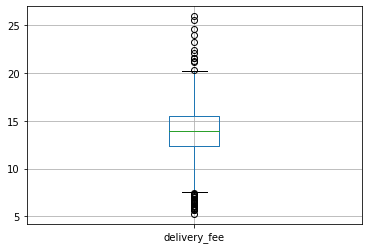

In [67]:
df_outlier = pd.read_csv('Group081_outlier_data.csv', float_precision='round_trip')
df_missing = pd.read_csv('Group081_missing_data.csv', float_precision='round_trip')
df_missing.dropna(inplace=True)
fee = df_outlier.boxplot(column='delivery_fee')

### Boxplots
* Because if a customer has loyalty, they get a 50% discount on delivery fee, the outliers in delivery fee will not be accurated. Therefore, we will tranlate delivery fee to original delivery fee.
* The delivery_fee is influenced by distance, weekend or weekday, and time of the day, therefore, the outlier of delivery_fee is Multivariate outlier.
* **Because it is multivariate outlier, we use linear models to detect the outliers.**

## Step 02: Multivariate Outlier Detection(by using Linear models)
<a id="partc2-2"></a>
In this step we will train a linear regression model by using missing value data set:

$$
Delivery\,\,fee_{bk} = a_1x_1\,+\,a_2x_2\,+\,a_3x_3\,+\,b\\
x_1:\,weekend\,or\,weekday(\,1\,or\,0\,)\\\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
x_2:\,time\,of\,the\,day(\,morning\,0,\,afternoon\,1,\,evening\,2\,)\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,x_3:\,distance\,between\,branch\,of\,BK\,and\,customer\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
$$

$$
Delivery\,\,fee_{tp} = a_1x_1\,+\,a_2x_2\,+\,a_3x_3\,+\,b\\
x_1:\,weekend\,or\,weekday(\,1\,or\,0\,)\\\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
x_2:\,time\,of\,the\,day(\,morning\,0,\,afternoon\,1,\,evening\,2\,)\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,x_3:\,distance\,between\,branch\,of\,TP\,and\,customer\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
$$

$$
Delivery\,\,fee_{ns} = a_1x_1\,+\,a_2x_2\,+\,a_3x_3\,+\,b\\
x_1:\,weekend\,or\,weekday(\,1\,or\,0\,)\\\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
x_2:\,time\,of\,the\,day(\,morning\,0,\,afternoon\,1,\,evening\,2\,)\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,x_3:\,distance\,between\,branch\,of\,NS\,and\,customer
$$




   Create the trans_order_type function that translate order_type to 𝑚𝑜𝑟𝑛𝑖𝑛𝑔-0,𝑎𝑓𝑡𝑒𝑟𝑛𝑜𝑜𝑛-1,𝑒𝑣𝑒𝑛𝑖𝑛𝑔-2.

In [68]:
def trans_order_type(order_type):
    if order_type =='Breakfast':
        result= 0
    elif order_type =='Lunch':
        result = 1
    elif order_type =='Dinner':
        result = 2
    return result

In [69]:
# translate order_type to 𝑚𝑜𝑟𝑛𝑖𝑛𝑔-0,𝑎𝑓𝑡𝑒𝑟𝑛𝑜𝑜𝑛-1,𝑒𝑣𝑒𝑛𝑖𝑛𝑔-2
df_outlier['order_type_num'] = df_outlier.apply(lambda x: trans_order_type(x.order_type), axis = 1)

df_missing['order_type_num'] = df_missing.apply(lambda x: trans_order_type(x.order_type), axis = 1)

In [70]:
# tranlate date to weekday and weekend
df_outlier['date_time']=pd.to_datetime(df_outlier['date'])
df_outlier['weekday']=df_outlier['date_time'].dt.day_name()

df_missing['date_time']=pd.to_datetime(df_missing['date'])
df_missing['weekday']=df_missing['date_time'].dt.day_name()


   Create the weekday function that if weekday is sunday or saturday the result is one, else is zero.

In [71]:
def weekday(input_weekday):
    if input_weekday == 'Sunday' or input_weekday == 'Saturday':
        result=1
    else:
        result=0
    return result

In [72]:
# translate to weekday and weekend to 0 and 1
df_outlier['weekday_delivery'] = df_outlier['weekday'].apply(weekday)

df_missing['weekday_delivery'] = df_missing['weekday'].apply(weekday)


   Create the original_deliveryfee function that convert the delivery fee to original delivery fee.

In [73]:
def original_deliveryfee(loyalty,fee):
    if loyalty ==1:
        result= fee*2
    else:
        result = fee
    return result

In [74]:
# convert the delicery fee to original delivery fee
df_outlier['original_fee'] = df_outlier.apply(lambda x: original_deliveryfee(x['customerHasloyalty?'], x.delivery_fee), axis = 1)

df_missing['original_fee'] = df_missing.apply(lambda x: original_deliveryfee(x['customerHasloyalty?'], x.delivery_fee), axis = 1)




   Instatiate linear regression model for each branch based on missing data set

In [75]:
#instatiate linear regression model for each branch
lm_for_outlier_bk = LinearRegression()
lm_for_outlier_ns = LinearRegression()
lm_for_outlier_tp = LinearRegression()

In [76]:
df_missing_bk=df_missing[(df_missing['branch_code'] == 'BK')]
df_missing_ns=df_missing[(df_missing['branch_code'] == 'NS')]
df_missing_tp=df_missing[(df_missing['branch_code'] == 'TP')]

In [77]:
lm_for_outlier_bk.fit(df_missing_bk[['distance_to_customer_KM','order_type_num','weekday_delivery']],df_missing_bk['original_fee'])

lm_for_outlier_ns.fit(df_missing_ns[['distance_to_customer_KM','order_type_num','weekday_delivery']],df_missing_ns['original_fee'])

lm_for_outlier_tp.fit(df_missing_tp[['distance_to_customer_KM','order_type_num','weekday_delivery']],df_missing_tp['original_fee'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
df1_outlier_bk=df_outlier[(df_outlier['branch_code'] == 'BK')]
df1_outlier_ns=df_outlier[(df_outlier['branch_code'] == 'NS')]
df1_outlier_tp=df_outlier[(df_outlier['branch_code'] == 'TP')]

In [79]:
#lm_full.fit(X_train,y_train)
#df1_outlier_bk=df_outlier[(df_outlier['branch_code'] == 'BK')]
X_train, X_test, y_train, y_test = train_test_split(df1_outlier_tp.loc[:, ['distance_to_customer_KM', 'order_type_num','weekday_delivery']],df1_outlier_tp.iloc[:,-1:], random_state = 2)

In [80]:
# create a drop list of colums name
drop_list=['order_id','order_type','date','time','branch_code','order_items','order_price','customer_lat','customer_lon','customerHasloyalty?','delivery_fee','date_time','weekday','original_fee']

In [81]:
# create df1_outlier_bk that branch_code is BK in df1_outlier
df1_outlier_bk=df_outlier[(df_outlier['branch_code'] == 'BK')]
# create df1_outlier_bk that branch_code is NS in df1_outlier
df1_outlier_ns=df_outlier[(df_outlier['branch_code'] == 'NS')] 
# create df1_outlier_bk that branch_code is TP in df1_outlier
df1_outlier_tp=df_outlier[(df_outlier['branch_code'] == 'TP')] 

In [82]:
# predict the original predict_fee
df1_outlier_bk['predict_fee'] = lm_for_outlier_bk.predict(df1_outlier_bk.drop(drop_list,axis=1))
df1_outlier_ns['predict_fee'] = lm_for_outlier_ns.predict(df1_outlier_ns.drop(drop_list,axis=1))
df1_outlier_tp['predict_fee'] = lm_for_outlier_tp.predict(df1_outlier_tp.drop(drop_list,axis=1))

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value


   Create the trans_deliverfee function that convert the original delivery fee to final delivery fee.

In [83]:
def trans_deliverfee(loyalty,fee):
    if loyalty ==1:
        result= fee/2
    else:
        result = fee
    return result

In [84]:
df1_outlier_bk['predict_fee'] = df1_outlier_bk.apply(lambda x: trans_deliverfee(x['customerHasloyalty?'], x.predict_fee), axis = 1)
df1_outlier_ns['predict_fee'] = df1_outlier_ns.apply(lambda x: trans_deliverfee(x['customerHasloyalty?'], x.predict_fee), axis = 1)
df1_outlier_tp['predict_fee'] = df1_outlier_tp.apply(lambda x: trans_deliverfee(x['customerHasloyalty?'], x.predict_fee), axis = 1)

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [85]:
outlier_bk_delivery_fee = df1_outlier_bk.set_index('order_id')['predict_fee']
outlier_ns_delivery_fee = df1_outlier_ns.set_index('order_id')['predict_fee']
outlier_tp_delivery_fee = df1_outlier_tp.set_index('order_id')['predict_fee']

In [86]:
# impute the predict_fee data in df_outlier
df_outlier['predict_fee'] = df_outlier['order_id'].map(outlier_bk_delivery_fee)
df_outlier['predict_fee'] = df_outlier['order_id'].map(outlier_ns_delivery_fee).fillna(df_outlier['predict_fee'])
df_outlier['predict_fee'] = df_outlier['order_id'].map(outlier_tp_delivery_fee).fillna(df_outlier['predict_fee'])

## Step 03: Linear models for multivariate outlier (Box plot)
<a id="step3"></a>

In this step, we get the expected( or predicted) values of delivery fee by using linear models we model before. 

We want to find lower-dimensional subspaces, in which the outlier points behave very differently from other points. 

Therefore, we use absolute value of original delivery fee - predict delivery fee to get the outlier value.

According to the boxplot, we can notice that if the value of original delivery fee - predict delivery fee is more than two, this value will be outlier.

In [87]:
def minus_abs(original,predict):
    result=abs(original-predict)
    return result

In [88]:
df_outlier['original-predict']=df_outlier.apply(lambda x: minus_abs(x.delivery_fee, x.predict_fee), axis = 1)

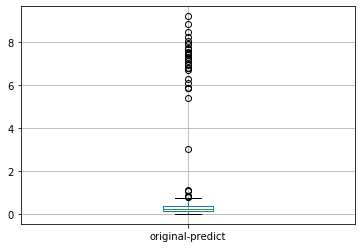

In [89]:
fee = df_outlier.boxplot(column='original-predict')

In [90]:
df_outlier[df_outlier['original-predict'] > 2]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,order_type_num,date_time,weekday,weekday_delivery,original_fee,predict_fee,original-predict
16,ORDI10282,2018-05-13,12:23:39,Lunch,NS,"[('Salad', 8), ('Fries', 3)]",173.60,-37.804077,144.959167,0,7.457,7.351809,1,2018-05-13,Sunday,1,7.351809,14.876757,7.524948
21,ORDA00173,2018-10-31,17:58:18,Dinner,BK,"[('Fish&Chips', 4), ('Salmon', 4), ('Shrimp', 4)]",520.00,-37.815714,144.998303,0,4.744,5.629478,2,2018-10-31,Wednesday,0,5.629478,11.461630,5.832152
22,ORDZ06215,2018-09-02,16:06:45,Dinner,NS,"[('Pasta', 9), ('Shrimp', 8), ('Fish&Chips', 6...",1258.50,-37.812416,144.969245,0,7.515,7.968138,2,2018-09-02,Sunday,1,7.968138,15.469250,7.501112
37,ORDB01034,2018-05-12,12:13:31,Lunch,TP,"[('Fries', 10), ('Salad', 10), ('Burger', 1), ...",952.00,-37.803158,144.962751,0,9.431,7.013524,1,2018-05-12,Saturday,1,7.013524,14.228941,7.215417
51,ORDY01076,2018-12-12,19:29:34,Dinner,TP,"[('Salmon', 9), ('Shrimp', 10), ('Fish&Chips',...",1306.50,-37.817750,144.974697,0,8.306,6.407101,2,2018-12-12,Wednesday,0,6.407101,12.481975,6.074874
79,ORDC08442,2018-08-01,14:55:46,Lunch,NS,"[('Burger', 10), ('Steak', 3), ('Salad', 2), (...",543.40,-37.818711,144.916799,0,11.071,8.247044,1,2018-08-01,Wednesday,0,8.247044,16.689305,8.442261
89,ORDB10510,2018-05-20,12:33:48,Lunch,TP,"[('Salad', 4), ('Burger', 5)]",223.80,-37.809784,144.993257,0,10.438,7.663602,1,2018-05-20,Sunday,1,7.663602,15.090338,7.426736
93,ORDZ02133,2018-05-18,12:33:48,Lunch,NS,"[('Chicken', 3), ('Salad', 4), ('Steak', 2), (...",266.80,-37.820788,144.954764,0,9.396,22.072682,1,2018-05-18,Friday,0,22.072682,14.955661,7.117021
112,ORDB00074,2018-10-05,17:07:36,Dinner,TP,"[('Shrimp', 6), ('Pasta', 8)]",544.00,-37.806185,144.959265,0,8.997,19.834716,2,2018-10-05,Friday,0,19.834716,13.073062,6.761654
113,ORDJ07215,2018-01-12,08:20:16,Breakfast,TP,"[('Eggs', 5), ('Pancake', 5)]",231.25,-37.807149,144.959072,1,8.981,8.812182,0,2018-01-12,Friday,0,17.624363,5.813247,2.998934


## Step 04: Remove outliers for "delivery_fee"
<a id="step4"></a>
In this step, we remove outlier rows in outlier dataset

In [91]:
#drop the rows that the 'original-predict' is better than 2
df_outlier.drop(df_outlier[df_outlier['original-predict'] > 2].index, inplace=True)

In [92]:
#drop the original_fee column
df_outlier.drop(columns=['order_type_num','date_time','weekday','weekday_delivery','original_fee','predict_fee','original-predict'], inplace=True)

## Step 05: Output the csv file
<a id="step5"></a>
In this step, output the csv file.

In [93]:
df_outlier=df_outlier.set_index('order_id')
df_outlier.to_csv("Group081_outlier_data_solution.csv")  

# PART C: Impute the missing values in missing dataset
<a id="part_c"></a>

## Step 01: EDA
<a id="step_c1"></a>
In this step, we perform non-graphical EDA methods to understand the data

In [94]:
# Reading the dataset into a dataframe using Pandas
df1 = pd.read_csv('Group081_missing_data.csv', float_precision='round_trip')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                400 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [95]:
df1.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64

### finding
* We can notice that they are three data types in this dataset: float, int, object
* In additional, there are some missing data in this dataset:
    * 100 missing rows in branch_code column
    * 50 missing rows in distance_to_customer_KM
    * 50 missing rows in delivery_fee
* There are 12 columns in this dataset


   Check the dataset when delivery_fee is NaN

In [96]:
df1[df1.delivery_fee.isnull()]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
5,ORDA10393,2018-03-09,10:11:49,Breakfast,BK,"[('Pancake', 7), ('Coffee', 3), ('Eggs', 2)]",236.25,-37.816221,144.995909,0,4.988,NaN
15,ORDA06940,2018-04-16,11:22:49,Breakfast,BK,"[('Pancake', 10), ('Eggs', 7)]",396.50,-37.812167,144.962227,0,7.657,NaN
20,ORDK03501,2018-09-28,16:57:27,Dinner,BK,"[('Shrimp', 10), ('Salmon', 4), ('Pasta', 10),...",1259.00,-37.810001,144.944741,0,9.299,NaN
23,ORDJ01248,2018-07-14,14:25:21,Lunch,TP,"[('Steak', 9), ('Chicken', 6)]",597.00,-37.818813,145.001782,0,10.746,NaN
53,ORDY07583,2018-11-06,18:18:35,Dinner,TP,"[('Salmon', 4), ('Pasta', 1), ('Shrimp', 7)]",569.50,-37.807066,144.960036,0,8.868,NaN
66,ORDY02096,2018-09-11,16:27:02,Dinner,TP,"[('Pasta', 5), ('Salmon', 9), ('Fish&Chips', 1...",1234.50,-37.822630,144.964171,0,7.517,NaN
67,ORDK05345,2018-12-04,19:09:17,Dinner,BK,"[('Fish&Chips', 5), ('Salmon', 2)]",257.00,-37.810693,145.011093,0,4.014,NaN
120,ORDB01255,2018-10-01,16:57:27,Dinner,TP,"[('Shrimp', 4), ('Pasta', 4), ('Fish&Chips', 9)]",641.00,-37.814532,144.938202,0,10.304,NaN
130,ORDY02476,2018-11-24,18:49:00,Dinner,TP,"[('Salmon', 7), ('Shrimp', 7)]",665.00,-37.819001,144.985083,0,9.164,NaN
139,ORDK00338,2018-08-13,15:26:11,Lunch,BK,"[('Salad', 1), ('Fries', 10), ('Burger', 8), (...",545.20,-37.810626,144.996732,0,4.601,NaN


### finding
The delicery fee depends linearly (but in different ways for each branch) on:
* weekend or weekday(1 or 0)
* time of the day(morning0 , afternoon 1, evening 2)
* distance between branch and customer

If a customer fas loyalty, they get a 50% discount on delivery fee

According to former cell, when deliver_fee is NaN, there are no missing data in date, order_type, and distance_to_customer_KM. 
**Therefore, we can first impute the missing data of delivery_fee**

## Step 02: Impute the missing data of delivery_fee
<a id="step_c2"></a>
In this step, we will impute the missing data of delivery_fee by Linear regression imputation because the fee depends linerly( but in different ways for each branch) on weekend or weekday, time of the day,and distance between branch and customer.

Therefore, in this step, we will create a dataset that has no missing values, model the linear regression, use this separate model for the imputation.

### Step 02-1: Create a dataset that has no missing values
<a id="partc2-1"></a>

In [97]:
df1_dropna = df1.copy()
df1_impute_delivery_fee = df1.copy()

#drop the NaN value
df1_dropna.dropna(inplace=True)

### Step 02-2: Train a linear regression model and predict the 'delivery_fee' values for the missing data set
<a id="partc2-2"></a>
In this step we will train a linear regression model:

$$
Delivery\,\,fee_{bk} = a_1x_1\,+\,a_2x_2\,+\,a_3x_3\,+\,b\\
x_1:\,weekend\,or\,weekday(\,1\,or\,0\,)\\\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
x_2:\,time\,of\,the\,day(\,morning\,0,\,afternoon\,1,\,evening\,2\,)\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,x_3:\,distance\,between\,branch\,of\,BK\,and\,customer\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
$$

$$
Delivery\,\,fee_{tp} = a_1x_1\,+\,a_2x_2\,+\,a_3x_3\,+\,b\\
x_1:\,weekend\,or\,weekday(\,1\,or\,0\,)\\\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
x_2:\,time\,of\,the\,day(\,morning\,0,\,afternoon\,1,\,evening\,2\,)\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,x_3:\,distance\,between\,branch\,of\,TP\,and\,customer\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
$$

$$
Delivery\,\,fee_{ns} = a_1x_1\,+\,a_2x_2\,+\,a_3x_3\,+\,b\\
x_1:\,weekend\,or\,weekday(\,1\,or\,0\,)\\\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
x_2:\,time\,of\,the\,day(\,morning\,0,\,afternoon\,1,\,evening\,2\,)\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,x_3:\,distance\,between\,branch\,of\,NS\,and\,customer
$$





In [98]:
# translate order_type to 𝑚𝑜𝑟𝑛𝑖𝑛𝑔-0,𝑎𝑓𝑡𝑒𝑟𝑛𝑜𝑜𝑛-1,𝑒𝑣𝑒𝑛𝑖𝑛𝑔-2
df1_dropna.order_type.replace('Breakfast', 0,inplace=True)
df1_dropna.order_type.replace('Lunch', 1,inplace=True)
df1_dropna.order_type.replace('Dinner', 2,inplace=True)

df1_impute_delivery_fee.order_type.replace('Breakfast', 0,inplace=True)
df1_impute_delivery_fee.order_type.replace('Lunch', 1,inplace=True)
df1_impute_delivery_fee.order_type.replace('Dinner', 2,inplace=True)

In [99]:
# tranlate date to weekday and weekend
df1_dropna['date']=pd.to_datetime(df1_dropna['date'])
df1_dropna['weekday']=df1_dropna['date'].dt.day_name()

df1_impute_delivery_fee['date']=pd.to_datetime(df1_impute_delivery_fee['date'])
df1_impute_delivery_fee['weekday']=df1_impute_delivery_fee['date'].dt.day_name()


In [100]:
# translate to weekday and weekend to 0 and 1
df1_dropna['weekday_delivery'] = df1_dropna['weekday'].apply(weekday)

df1_impute_delivery_fee['weekday_delivery'] = df1_impute_delivery_fee['weekday'].apply(weekday)

In [101]:
# convert the delicery fee to original delivery fee
df1_dropna['original_fee'] = df1_dropna.apply(lambda x: original_deliveryfee(x['customerHasloyalty?'], x.delivery_fee), axis = 1)

df1_impute_delivery_fee['original_fee'] = df1_impute_delivery_fee.apply(lambda x: original_deliveryfee(x['customerHasloyalty?'], x.delivery_fee), axis = 1)

In [102]:
#instatiate linear regression model for each branch
lm_for_impute_bk = LinearRegression()
lm_for_impute_ns = LinearRegression()
lm_for_impute_tp = LinearRegression()


In [103]:
# fit the data in to linear regression model
lm_for_impute_bk.fit(df1_dropna[df1_dropna['branch_code'] == 'BK'][['order_type','distance_to_customer_KM','weekday_delivery']],df1_dropna[df1_dropna['branch_code'] == 'BK']['original_fee'])

lm_for_impute_ns.fit(df1_dropna[df1_dropna['branch_code'] == 'NS'][['order_type','distance_to_customer_KM','weekday_delivery']],df1_dropna[df1_dropna['branch_code'] == 'NS']['original_fee'])

lm_for_impute_tp.fit(df1_dropna[df1_dropna['branch_code'] == 'TP'][['order_type','distance_to_customer_KM','weekday_delivery']],df1_dropna[df1_dropna['branch_code'] == 'TP']['original_fee'])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# create a drop list of colums name
drop_list=['order_id','date','time','branch_code','order_items','order_price','customer_lat','customer_lon','customerHasloyalty?','delivery_fee','weekday','original_fee']

In [105]:
# create df1_impute_bk that branch_code is BK for df1_impute_delivery_fee
df1_impute_bk=df1_impute_delivery_fee[(df1_impute_delivery_fee['branch_code'] == 'BK')]
# create df1_impute_bk that branch_code is NS for df1_impute_delivery_fee
df1_impute_ns=df1_impute_delivery_fee[(df1_impute_delivery_fee['branch_code'] == 'NS')] 
# create df1_impute_bk that branch_code is TP for df1_impute_delivery_fee
df1_impute_tp=df1_impute_delivery_fee[(df1_impute_delivery_fee['branch_code'] == 'TP')] 

In [106]:
# predict the original delivery_fee
df1_impute_bk['original_fee'][df1_impute_bk['original_fee'].isnull()] = lm_for_impute_bk.predict(df1_impute_bk.drop(drop_list,axis=1))
df1_impute_ns['original_fee'][df1_impute_ns['original_fee'].isnull()] = lm_for_impute_ns.predict(df1_impute_ns.drop(drop_list,axis=1))
df1_impute_tp['original_fee'][df1_impute_tp['original_fee'].isnull()] = lm_for_impute_tp.predict(df1_impute_tp.drop(drop_list,axis=1))

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tangwei/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/tangwei/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/tangwei/ana

In [107]:
def trans_deliverfee(loyalty,fee):
    if loyalty ==1:
        result= fee/2
    else:
        result = fee
    return result

In [108]:
# translate original delivery fee to final delivery fee
df1_impute_bk['delivery_fee'] = df1_impute_bk.apply(lambda x: trans_deliverfee(x['customerHasloyalty?'], x.original_fee), axis = 1)
df1_impute_ns['delivery_fee'] = df1_impute_ns.apply(lambda x: trans_deliverfee(x['customerHasloyalty?'], x.original_fee), axis = 1)
df1_impute_tp['delivery_fee'] = df1_impute_tp.apply(lambda x: trans_deliverfee(x['customerHasloyalty?'], x.original_fee), axis = 1)

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [109]:
impute_bk_delivery_fee = df1_impute_bk.set_index('order_id')['delivery_fee']
impute_ns_delivery_fee = df1_impute_ns.set_index('order_id')['delivery_fee']
impute_tp_delivery_fee = df1_impute_tp.set_index('order_id')['delivery_fee']

### Step 02-3: Impute the missing data of delivery_fee
<a id="partc2-3"></a>
In this step, we will impute the missing data that we get from former cells of delivery_fee to df1

In [110]:
# impute the missing data of delivery_fee in df1
df1['delivery_fee'] = df1['order_id'].map(impute_bk_delivery_fee).fillna(df1['delivery_fee'])
df1['delivery_fee'] = df1['order_id'].map(impute_ns_delivery_fee).fillna(df1['delivery_fee'])
df1['delivery_fee'] = df1['order_id'].map(impute_tp_delivery_fee).fillna(df1['delivery_fee'])

In [111]:
df1.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                 0
dtype: int64

## Step 03: Impute the missing data of branch_code( which has distance)
<a id="part_c3"></a>

The restaurant uses Djikstra algorithm to calculate the shortest distance between customer and restaurant. Therefore, if we have distance between customer and customer id, we can get the branch_code.

In this step, we will impute the missing rows of branch_code which has distance between customer and restaurant.

In [112]:
df1[df1.branch_code.isnull()][df1.distance_to_customer_KM.notna()]

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
6,ORDI06579,2018-06-10,13:14:21,Lunch,NaN,"[('Chicken', 10), ('Burger', 8), ('Fries', 3),...",919.00,-37.799367,144.960041,0,7.104,14.159896
10,ORDK05324,2018-03-16,10:21:58,Breakfast,NaN,"[('Eggs', 2), ('Pancake', 4), ('Cereal', 10)]",351.00,-37.799393,145.005352,0,4.926,9.695161
21,ORDC03782,2018-01-06,08:10:08,Breakfast,NaN,"[('Pancake', 4), ('Cereal', 6), ('Eggs', 10), ...",510.50,-37.802135,144.948340,1,8.307,8.251780
22,ORDX01555,2018-09-22,16:47:19,Dinner,NaN,"[('Salmon', 1), ('Shrimp', 1), ('Pasta', 9), (...",692.50,-37.824059,144.973518,0,7.709,17.496778
27,ORDX06177,2018-08-19,15:36:20,Lunch,NaN,"[('Burger', 9), ('Salad', 4), ('Chicken', 9), ...",887.80,-37.814354,144.963202,0,7.742,15.999526
44,ORDA06629,2018-09-06,16:16:54,Dinner,NaN,"[('Shrimp', 9), ('Salmon', 10), ('Fish&Chips',...",1333.50,-37.812877,144.937270,0,10.161,17.308719
47,ORDX04443,2018-06-06,13:04:13,Lunch,NaN,"[('Fries', 5), ('Salad', 8)]",197.60,-37.805267,144.942483,0,9.347,15.889567
48,ORDB03429,2018-01-29,08:50:42,Breakfast,NaN,"[('Eggs', 8), ('Pancake', 7)]",345.75,-37.823955,144.937427,0,9.812,12.059303
56,ORDK09059,2018-03-11,10:11:49,Breakfast,NaN,"[('Cereal', 2), ('Pancake', 8)]",236.00,-37.811232,144.935487,0,10.281,17.948878
78,ORDJ04346,2018-02-07,09:10:59,Breakfast,NaN,"[('Cereal', 4), ('Pancake', 7)]",253.75,-37.824397,144.988546,0,9.196,11.738042


### Step 03-1: build the networkx for Djikstra algorithm
<a id="partc3-1"></a>

In this step, we use networkx python package to calculate the shortest distance between customer and restaurant. 

In [113]:
# Reading the dataset into a dataframe using Pandas
df_nodes = pd.read_csv('nodes.csv', float_precision='round_trip')
df_branches = pd.read_csv('branches.csv', float_precision='round_trip')
df_edges = pd.read_csv('edges.csv', float_precision='round_trip')

# get the values in 'u' and 'v' columns from df_edges
edge_list=df_edges.loc[:, ['u', 'v']].values.tolist()
# get the values in 'u', 'v', 'distance(m)'columns from df_edges
weighted_edges_list=df_edges.loc[:, ['u', 'v','distance(m)']].values.tolist()
# get the values in 'node' colmun from df_nodes
node_list=df_nodes['node'].values.tolist()


import networkx as nx
#build networdx
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)
G.add_weighted_edges_from(weighted_edges_list)


   Create the get_distance function that calculate the distance between customer and restaurant.

In [114]:
def get_distance(source_node,target_node):
    distance=nx.dijkstra_path_length(G, source=source_node, target=target_node)/1000
    return distance


   Create the get_cost_node function that using order_id to find customer node from df_nodes.

In [115]:
def get_cost_node(order_id):
    lat=df1[df1['order_id'] == order_id]['customer_lat'].values[0]
    lon=df1[df1['order_id'] == order_id]['customer_lon'].values[0]    
    result = df_nodes[df_nodes['lat'] == lat ][df_nodes['lon'] == lon ]['node'].values[0]
    return result

### Step 03-2: Impute the missing data of branch_code 
<a id="partc3-2"></a>
In this step, we will impute the missing data of btanch_code.


   Create the impute_branch1 function that impute the branch_code.

In [116]:
branch_node={'NS':2455254505,'TP':1390575046,'BK':1889485053}

def impute_branch1(order_id,distance,branch_code):
    # get the customer node
    cust_node=get_cost_node(order_id)
    
    # if the distance in this data set is equal to the distance we use get_distance function, the branch code is "NS" 
    if get_distance(cust_node,branch_node['NS']) == distance:
        result='NS'
     # if the distance in this data set is equal to the distance we use get_distance function, the branch code is "TP" 
    elif get_distance(cust_node,branch_node['TP']) == distance:
        result='TP'
     # if the distance in this data set is equal to the distance we use get_distance function, the branch code is "BK" 
    elif get_distance(cust_node,branch_node['BK']) == distance:
        result='BK'
    else:
        result= branch_code
    
    return result

In [117]:
df1['branch_code'][df1['branch_code'].isnull()] = df1[df1['distance_to_customer_KM'].notna()].apply(lambda x: impute_branch1(x.order_id,x.distance_to_customer_KM, x.branch_code), axis = 1)

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Step 04: Impute the missing data of branch_code( which has no value of distance) and distance
<a id="part_c4"></a>

In this step, we impute the missing data of branch_code and distance by using linear regression model that we former trained.

In this case, we only have the delivery fee, therefore, we will do following steps to predict the branch_code and distance: 
* First, we calculate the distance between customer and three restaurant, and then we will get three value of distance from three different restaurant.
* Second, use this three different value of distance in linear regression model that we former trained.
* Third, find the predict delivery fee which is Closest to the deliery fee we have.
* Fourth, predict the branch_code and distance

### Step 04-1: Impute the missing data of branch_code and distance
<a id="partc4-1"></a>

In [118]:
# translate order_type to 𝑚𝑜𝑟𝑛𝑖𝑛𝑔-0,𝑎𝑓𝑡𝑒𝑟𝑛𝑜𝑜𝑛-1,𝑒𝑣𝑒𝑛𝑖𝑛𝑔-2
df1['order_type_num'] = df1.apply(lambda x: trans_order_type(x.order_type), axis = 1)

In [119]:
# tranlate date to weekday and weekend
df1['date_time']=pd.to_datetime(df1['date'])
df1['weekday']=df1['date_time'].dt.day_name()

In [120]:
# translate to weekday and weekend to 0 and 1
df1['weekday_delivery'] = df1['weekday'].apply(weekday)


   Create the branch_find function that impute the branch_code.

In [121]:
def branch_find(order_id,order_type,weekday_delivery,loyalty,delivery_fee):
    #get the customer node
    cust_node=get_cost_node(order_id)
    
    #get the distance if branch is BK
    distance_bk=get_distance(cust_node,branch_node['BK'])
    to_be_predicted_bk=np.array([[order_type, distance_bk,weekday_delivery]])
    #predict the delivery fee if branch is BK
    predicted_bk_fee=lm_for_impute_bk.predict(to_be_predicted_bk)
    
    #get the distance if branch is NS
    distance_ns=get_distance(cust_node,branch_node['NS'])
    to_be_predicted_ns=np.array([[order_type, distance_ns,weekday_delivery]])
    #predict the delivery fee if branch is NS
    predicted_ns_fee=lm_for_impute_ns.predict(to_be_predicted_ns)
    
    #get the distance if branch is TP
    distance_tp=get_distance(cust_node,branch_node['TP'])
    to_be_predicted_tp=np.array([[order_type, distance_tp,weekday_delivery]])
    #predict the delivery fee if branch is TP
    predicted_tp_fee=lm_for_impute_tp.predict(to_be_predicted_tp)
    
    if loyalty == 0:
        fee=delivery_fee
    elif loyalty ==1:
        fee=delivery_fee*2
    
    #calculate the distance from the delivery fee we predict to delivery fee in this dataset
    abs_bk=abs(fee-predicted_bk_fee)
    abs_ns=abs(fee-predicted_ns_fee)
    abs_tp=abs(fee-predicted_tp_fee)
        
    # if abs_bk is the smallest, then we predict branch_code is BK
    if abs_bk<abs_ns and abs_bk<abs_tp:
        result='BK'
    # if abs_ns is the smallest, then we predict branch_code is NS
    elif abs_ns<abs_bk and abs_ns<abs_tp:
        result='NS'
    # if abs_tp is the smallest, then we predict branch_code is TP
    elif abs_tp<abs_bk and abs_tp<abs_ns:
        result='TP'
    
    return result




   Create the impute_distance function that impute the distance.

In [122]:
def impute_distance(order_id,order_type,weekday_delivery,loyalty,delivery_fee):
    #get the customer node
    cust_node=get_cost_node(order_id)
    
    #get the distance if branch is BK
    distance_bk=get_distance(cust_node,branch_node['BK'])
    to_be_predicted_bk=np.array([[order_type, distance_bk,weekday_delivery]])
    #predict the delivery fee if branch is BK
    predicted_bk_fee=lm_for_impute_bk.predict(to_be_predicted_bk)
    
    #get the distance if branch is NS
    distance_ns=get_distance(cust_node,branch_node['NS'])
    to_be_predicted_ns=np.array([[order_type, distance_ns,weekday_delivery]])
    #predict the delivery fee if branch is NS
    predicted_ns_fee=lm_for_impute_ns.predict(to_be_predicted_ns)
    
    #get the distance if branch is TP
    distance_tp=get_distance(cust_node,branch_node['TP'])
    to_be_predicted_tp=np.array([[order_type, distance_tp,weekday_delivery]])
    #predict the delivery fee if branch is TP
    predicted_tp_fee=lm_for_impute_tp.predict(to_be_predicted_tp)
    
    if loyalty == 0:
        fee=delivery_fee
    elif loyalty ==1:
        fee=delivery_fee*2
    
    #calculate the distance from the delivery fee we predict to delivery fee in this dataset
    abs_bk=abs(fee-predicted_bk_fee)
    abs_ns=abs(fee-predicted_ns_fee)
    abs_tp=abs(fee-predicted_tp_fee)
        
    # if abs_bk is the smallest, then we predict distance is distance_bk
    if abs_bk<abs_ns and abs_bk<abs_tp:
        result=distance_bk
    # if abs_ns is the smallest, then we predict distance is distance_ns
    elif abs_ns<abs_bk and abs_ns<abs_tp:
        result=distance_ns
    # if abs_tp is the smallest, then we predict distance is distance_tp
    elif abs_tp<abs_bk and abs_tp<abs_ns:
        result=distance_tp
    
    return result

In [123]:
df1['branch_code'][df1['branch_code'].isnull()] = df1.apply(lambda x: branch_find(x.order_id,x.order_type_num, x.weekday_delivery,x['customerHasloyalty?'],x.delivery_fee), axis = 1)
df1['distance_to_customer_KM'][df1['distance_to_customer_KM'].isnull()] = df1.apply(lambda x: impute_distance(x.order_id,x.order_type_num, x.weekday_delivery,x['customerHasloyalty?'],x.delivery_fee), axis = 1)

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/tangwei/anaconda3/lib/p

## Step 05: Out put the file
<a id="part_c5"></a>

In [124]:
#drop the 'order_type_num','date_time','weekday','weekday_delivery' columns
df1.drop(columns=['order_type_num','date_time','weekday','weekday_delivery'], inplace=True)

In [125]:
#output the csv file
df1=df1.set_index('order_id')
df1.to_csv("Group081_missing_data_solution.csv")  

# Summary
<a id="summary"></a>
In this assigment:
* First,we learn how to perform graphical and/or non-graphical EDA methods to understand the data.
* Second, learn how to detect and fix error in dirty data set
* Third, learn how to detect and remove outlier rows in outlier data set.
* Fourth, learn how to impute the missing values in missing data set.